In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2
from scipy.stats import spearmanr

In [39]:
import glob
import os
from protein_conformal.util import *
from tqdm import tqdm


In [3]:
import faiss

In [27]:
scope = np.load('/data/ron/protein-conformal/data/scope_swissprot_large/db.npy')
print(scope.shape)

# load scope metadata
scope_metadata = np.load('/data/ron/protein-conformal/data/scope_swissprot_large/meta.npy')
print(len(scope_metadata))

(74, 512)
74


In [29]:
afdb = np.load('/data/ron/protein-conformal/data/afdb_swissprot_large/db.npy')
# load afdb metadata
afdb_metadata = np.load('/data/ron/protein-conformal/data/afdb_swissprot_large/meta.npy')
print(len(afdb_metadata))
print(afdb.shape)

2302899
(2302899, 512)


In [31]:
afdb_lookup = load_database(afdb)

In [32]:
# Query for the 1st nearest neighbor
k = len(afdb_metadata)
D, I = query(afdb_lookup, scope, k)

In [33]:
I.shape, D.shape

((74, 2302899), (74, 2302899))

(array([2.000000e+00, 6.000000e+00, 1.800000e+01, 5.200000e+01,
        1.550000e+02, 3.810000e+02, 6.180000e+02, 1.208000e+03,
        2.375000e+03, 5.277000e+03, 1.119100e+04, 2.233100e+04,
        4.079000e+04, 7.393900e+04, 1.297000e+05, 2.197490e+05,
        3.607090e+05, 5.800270e+05, 9.119940e+05, 1.397444e+06,
        2.083682e+06, 3.012444e+06, 4.143541e+06, 5.430398e+06,
        6.739453e+06, 7.885944e+06, 8.765669e+06, 9.313365e+06,
        9.552890e+06, 9.525348e+06, 9.259261e+06, 8.812361e+06,
        8.215054e+06, 7.526195e+06, 6.770367e+06, 6.021559e+06,
        5.317814e+06, 4.686952e+06, 4.157929e+06, 3.712710e+06,
        3.340140e+06, 3.027005e+06, 2.758967e+06, 2.525877e+06,
        2.323466e+06, 2.140390e+06, 1.974766e+06, 1.818283e+06,
        1.674049e+06, 1.531737e+06, 1.398481e+06, 1.277039e+06,
        1.161740e+06, 1.053197e+06, 9.505240e+05, 8.537410e+05,
        7.616420e+05, 6.710190e+05, 5.889680e+05, 5.100900e+05,
        4.367690e+05, 3.736770e+05, 3.15

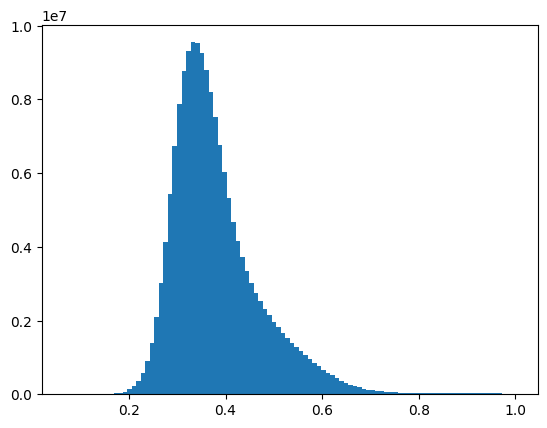

In [11]:
# plot histogram of distances
plt.hist(D.flatten(), bins=100)

## Load DALI results

In [40]:
# load all csvs into a single dataframe from /data/ron/protein-conformal/data/dali_multidomain_results_csv_small
# Get a list of all CSV files in the directory
csv_files = glob.glob('/data/ron/protein-conformal/data/dali_multidomain_results_csv_small/*.csv')

# Read each CSV file into a DataFrame and store all DataFrames in a dictionary where the key is the filename
dfs_dali = {os.path.splitext(os.path.basename(file))[0]: pd.read_csv(file) for file in csv_files}


In [132]:

# sort the dataframes by Z-score
for key in dfs_dali.keys():
    dfs_dali[key] = dfs_dali[key].sort_values(by='Z', ascending=False)


In [41]:
dfs_dali.keys()

dict_keys(['1u7lA', '3aa0A', '3nuhB', '1cc1L', '1srqA', '4ogcA', '1xqbA', '1sg6A', '2btvA', '2i06A', '1lfpA', '1a4eA', '1h5wA', '1et0A', '2avuE', '2i5hA', '2gafD', '1gnlA', '1nh1A', '1k9oI', '3nwaA', '4ckkA', '2ffjA', '1d3yA', '1vddA', '2hhvA', '1r6fA', '1kyqA', '3cw9A', '1szqA', '1ka1A', '2yzsA', '4an8A', '2hq2A', '1mw9X', '1vkyA', '1k8tA', '1dd9A', '2azeA', '1u8vA', '1urjA', '2oezA', '1no7A', '4dynA', '1ldjA', '1m1cA', '1io1A', '2b3tB', '3vb9A', '2o3iA', '2ijrA', '4wsbC', '2p62A', '1z0sA', '1q88A', '2dcfA', '1cc1S', '1knzA', '1x87A', '3jclA', '1twfB', '1fvhA', '3rlfF', '1zbpA', '1sr8A', '1zjcA', '1i2aA', '5d9aA', '2fiyA', '5id6A', '2i0zA', '2i71A', '1oisA'])

In [45]:
# Concatenate all DataFrames into a single DataFrame
df_dali = pd.concat(dfs_dali.values(), ignore_index=True)

In [46]:
df_dali.head()

,query,target,Z,RMSD,Alignment_Length,Hit_Length,Query_Length,Perc_Ident,Query_Cov_Perc,Alphafold_link
0,1u7lA,A0A812U4A1,6.0,5.7,121,853,1000,2,12.1,https://alphafold.ebi.ac.uk/entry/A0A812U4A1
1,1u7lA,A0A812UDJ4,5.0,27.1,122,900,1000,3,12.2,https://alphafold.ebi.ac.uk/entry/A0A812UDJ4
2,1u7lA,A0A5D4RV26,4.9,3.7,106,309,1000,4,10.6,https://alphafold.ebi.ac.uk/entry/A0A5D4RV26
3,1u7lA,A0A2N6NZ17,4.8,9.8,104,236,1000,6,10.4,https://alphafold.ebi.ac.uk/entry/A0A2N6NZ17
4,1u7lA,A0A7G9NSL4,4.7,9.5,127,192,1000,11,12.7,https://alphafold.ebi.ac.uk/entry/A0A7G9NSL4


In [47]:
df_dali['Z'].describe()

count    8.885524e+06
mean     3.026714e+00
std      1.069181e+00
min      2.000000e+00
25%      2.300000e+00
50%      2.800000e+00
75%      3.400000e+00
max      5.680000e+01
Name: Z, dtype: float64

<AxesSubplot:>

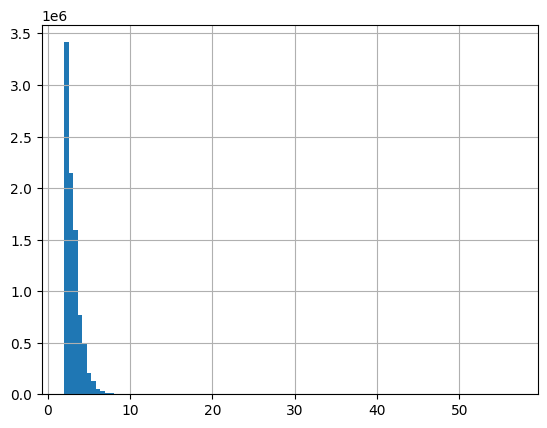

In [48]:
df_dali['Z'].hist(bins=100)

In [44]:
scope_metadata[0]

'2hhvA'

In [42]:
# get AFDB identifiers
metadata_test = [afdb_metadata[i] for i in I[0]]
print(len(metadata_test))

2302899


In [50]:
# Create a dictionary where the keys are the elements of afdb_metadata and the values are their indices
afdb_metadata_dict = {value: index for index, value in enumerate(afdb_metadata)}


In [ ]:
# for dfs_dali_key in dfs_dali.keys():
#     # Get the metadata for the current DataFrame
#     dfs
#     # Create a dictionary where the keys are the elements of metadata and the values are their indices
#     metadata_dict = {value: index for index, value in enumerate(metadata)}
#     # Create a list of indices for the current DataFrame
#     indices = [afdb_metadata_dict[metadata_dict[metadata_test[i]]] for i in range(len(metadata_test))]
#     # Add the indices to the DataFrame
#     dfs_dali[dfs_dali_key]['index'] = indices

In [51]:

# Now use this dictionary to find the indices of the elements in dali_test['target']
metadata_target = [afdb_metadata_dict[x] for x in df_dali['target'] if x in afdb_metadata_dict]

In [52]:
metadata_target[0:5]

[1880256, 1880442, 1325293, 724426, 1622531]

In [ ]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

In [138]:
results = []
for i in range(2): # I.shape[0]):
    metadata_model = [afdb_metadata[j] for j in I[i]]
    meta_query = scope_metadata[i]
    # get metadata of dali hits
    # metadata_dali = set(dfs_dali[meta_query]['target'].values)
    metadata_dali = dfs_dali[meta_query]['target']

    # precompute the DataFrame and create a dictionary for fast lookup
    df = dfs_dali[meta_query]
    z_score_dict = df.set_index('target')['Z'].to_dict()

    # get dali score
    dali_scores = np.zeros_like(metadata_model)
    for j, meta in tqdm(enumerate(metadata_model), leave=False):
        dali_scores[j] = z_score_dict.get(meta, 0)
    dali_scores = np.array(dali_scores, dtype=np.float32)

    results.append(({'meta_query': meta_query, 
                     'meta': metadata_model, 
                     'metadata_dali': list(metadata_dali), 
                     'Z_score': dali_scores, 
                     'S_i': D[i]}))

In [104]:
# Extract the first result
result = results[0]

# Ensure both Z_score and S_i are numpy arrays
z_scores = np.array(result['Z_score'])
s_i = np.array(result['S_i'])

In [96]:
results[0]['S_i']

array([0.9585886 , 0.9172157 , 0.91583586, ..., 0.1329757 , 0.13261065,
       0.13029015], dtype=float32)

In [97]:
results[0]['Z_score']

array([41.5, 33.2, 32.3, ...,  0. ,  0. ,  0. ])

In [94]:
results[0]['Z_score']

array(['41.5', '33.2', '32.3', ..., '0', '0', '0'], dtype='<U10')

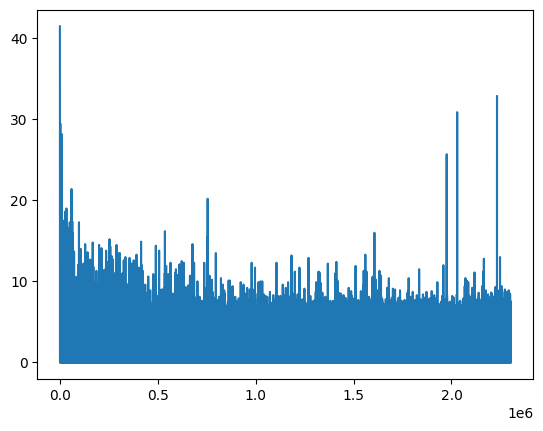

In [114]:
plt.plot(results[0]['Z_score'])

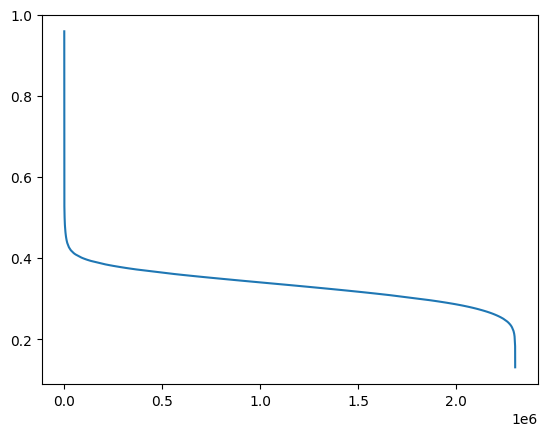

In [88]:
plt.plot(results[0]['S_i'])

In [137]:
results[0]['Z_score'][0:1000]

array([41.5, 33.2, 32.3, 26.8, 36.7, 38.1, 27.7, 25.2, 31.3, 22.6, 26.6,
       32.9, 24.8, 31.2, 30.9, 28.7, 24.9, 31.7, 32.9, 20.6, 24.1, 38. ,
       36.1, 33.9, 28.7, 27.2, 12.1, 39.1, 15.8, 18.4, 17.2, 34.1, 13.3,
       32.9, 27.3,  9.2,  9.8, 21.9, 32.6, 29.1, 11.3, 18.5, 14. , 25.4,
       30.9, 21.9, 17.2, 25.5, 17.6, 20.7, 24.5, 16.4, 31.5, 33.9, 24.3,
       18.3, 27. , 24. ,  6.2, 18.4, 19.8, 23.4, 22.4, 21.1, 15.3, 30.2,
        3.5, 11.8, 13.9, 19.4, 21.5, 15.7, 18.2, 23.2, 17. ,  8.6, 17. ,
       24.5, 14.5,  7.4, 12.2, 14.1, 14.1, 17.3, 11.9, 14.7, 18.8,  7.9,
       12.1,  8.2,  7.2, 13.3, 24.6, 10. ,  6.8, 20.3, 10.8, 10.7, 11.1,
       19.9, 24.8, 10.5,  8.3, 15.5, 12.7, 11.3, 21.1, 24.9, 14.7, 14.1,
       14.9,  9.1, 12.5, 12.8, 11.3, 14.5, 24.7, 13.8, 32. , 15.8, 12.1,
       15.9, 27.4, 13.2, 11.4, 12.4, 19.9, 10.2,  8.5, 15.9,  9.6,  8.9,
       20.1,  0. , 13.6, 16.5, 12.1,  8.8, 13.7, 21.1,  8.6, 15.1, 10.7,
       10.1, 11.8, 16. , 16.9, 10.1,  8.4, 18.6, 13

In [117]:
spearman_corr, p_value = spearmanr(z_scores, s_i)


In [118]:
spearman_corr, p_value

(0.0008161051457895789, 0.2155440504999531)

In [121]:
from scipy.stats import pearsonr

pearson_corr, p_value = pearsonr(z_scores, s_i)


In [122]:
pearson_corr, p_value

(0.02538192409260129, 0.0)

In [119]:
# correlation
print(np.corrcoef(results[0]['Z_score'], results[0]['S_i']))


[[1.         0.02538192]
 [0.02538192 1.        ]]


Text(0.5, 1.0, 'Z-score vs S_i')

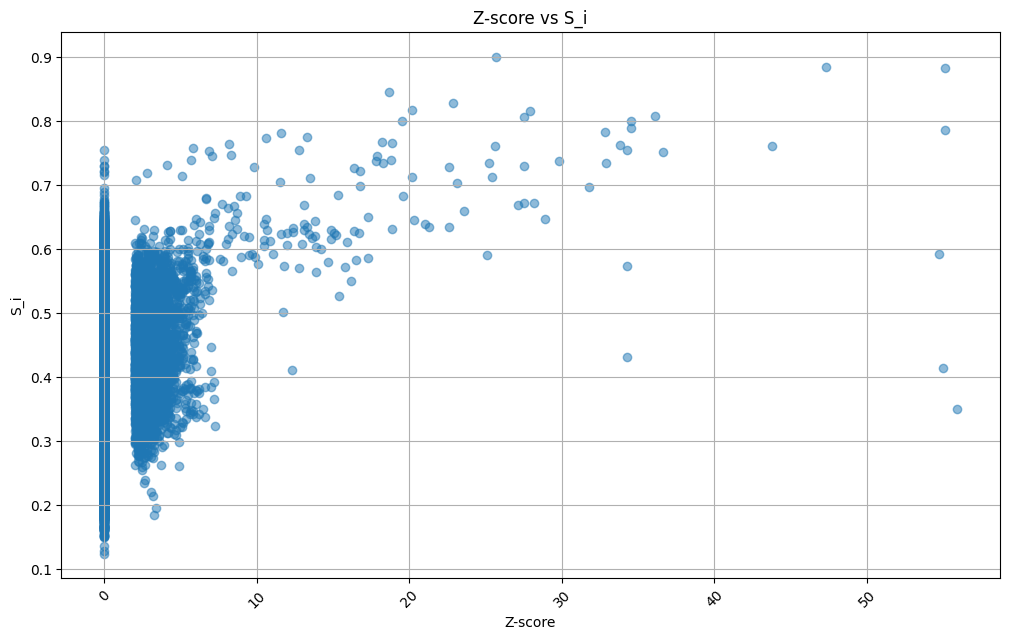

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(np.array(results[1]['Z_score']), np.array(results[1]['S_i']), alpha=0.5)
# plt.xticks([])  # Remove x-axis ticks to improve readability
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.xlabel('Z-score')
plt.ylabel('S_i')
plt.title('Z-score vs S_i')
# spearman correlation
# print(spearmanr(results[0]['Z_score'], results[0]['S_i']))

In [139]:
results[0]['meta'][0:5]

['A0A3D5UIR4', 'A0A847AZE0', 'A0A3S8VTL1', 'A0A5B5VW15', 'A0A7V7D4F0']

In [140]:
results[0]['metadata_dali'][0:5]

['A0A3D5UIR4', 'A0A832NLT4', 'A0A1G2CMQ2', 'E4UE10', 'A0A7V7D4F0']

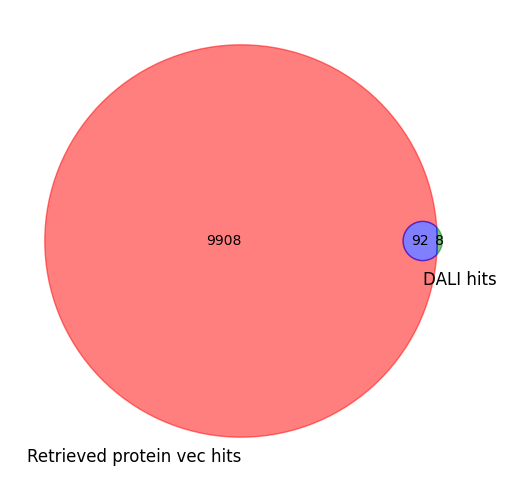

In [149]:
# look at top 1000 DALI hits vs top 10000 retrieved protein vec hits
plt.figure(figsize=(8, 6))

set1 = set(results[0]['meta'][0:10000])
set2 = set(results[0]['metadata_dali'][0:100])
venn = venn2([set1, set2], ('Retrieved protein vec hits', 'DALI hits'))

# Adding colors and transparency
venn.get_label_by_id('10').set_text(len(set1 - set2))  # Only in set1
venn.get_label_by_id('01').set_text(len(set2 - set1))  # Only in set2
venn.get_label_by_id('11').set_text(len(set1 & set2))  # In both sets

# Adding colors to the circles
venn.get_patch_by_id('10').set_color('red')
venn.get_patch_by_id('10').set_alpha(0.5)
venn.get_patch_by_id('01').set_color('green')
venn.get_patch_by_id('01').set_alpha(0.5)
venn.get_patch_by_id('11').set_color('blue')
venn.get_patch_by_id('11').set_alpha(0.5)

# plt.title('Venn Diagram of Retrieved Protein Vec Hits and DALI Hits')
# plt.show()

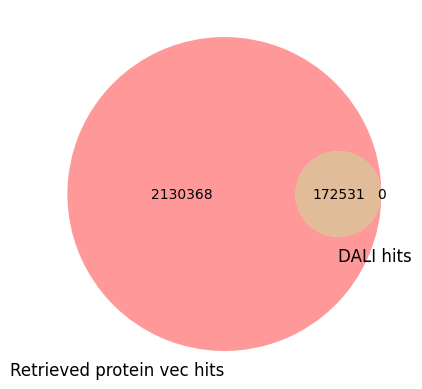

In [19]:
# make venn diagram of the intersection of the DALI results and the nearest neighbors, which would be metadata_test and dali_test['target']
venn2([set(metadata_test), set(dali_test['target'])], ('Retrieved protein vec hits', 'DALI hits'))
# set(dali_test[dali_test['Z'] > 10]['target'])


In [77]:
dali_test['Z'].describe()

count    172531.000000
mean          3.134578
std           1.322030
min           2.000000
25%           2.300000
50%           2.800000
75%           3.600000
max          41.500000
Name: Z, dtype: float64

In [20]:
# Create a dictionary where the keys are the elements of afdb_metadata and the values are their indices
afdb_metadata_dict = {value: index for index, value in enumerate(afdb_metadata)}

# Now use this dictionary to find the indices of the elements in dali_test['target']
metadata_test_target = [afdb_metadata_dict[x] for x in dali_test['target'] if x in afdb_metadata_dict]

In [21]:
lookup_dict_test = {value: index for index, value in enumerate(I[0])}

In [22]:
# dali_faiss_intersection = [lookup_dict_test[x] for x in metadata_test_target if x in lookup_dict_test]
dali_faiss_idcs = [lookup_dict_test[x] for x in metadata_test_target]

In [113]:
# KL divergence between the two distributions D[0][dali_faiss_idcs] and D[0]
from scipy.stats import entropy

# Ensure the distributions are normalized to represent probabilities
# dist1 = D[0][dali_faiss_idcs] / np.sum(D[0][dali_faiss_idcs])
# dist2 = D[0] / np.sum(D[0])

# # Calculate the KL divergence
# kl_divergence = entropy(dist1, dist2)

# Create a new array of zeros with the same shape as D[0]
full_dist1 = np.zeros_like(D[0])

# Place the values of D[0][dali_faiss_idcs] at the corresponding indices in the new array
full_dist1[dali_faiss_idcs] = D[0][dali_faiss_idcs]

# Now full_dist1 and D[0] have the same shape, and you can compute the KL divergence as before
dist1 = full_dist1 / np.sum(full_dist1)
dist2 = D[0] / np.sum(D[0])

kl_divergence = entropy(dist1, dist2)

In [23]:
print(np.mean(D[0][dali_faiss_idcs]), np.mean(D[0]))
print(np.std(D[0][dali_faiss_idcs]), np.std(D[0]))
print(np.min(D[0][dali_faiss_idcs]), np.min(D[0]))
print(np.max(D[0][dali_faiss_idcs]), np.max(D[0]))
print(np.median(D[0][dali_faiss_idcs]), np.median(D[0]))


0.33288264 0.33176088
0.044738337 0.041239277
0.16031328 0.13029015
0.9585886 0.9585886
0.33252382 0.33297122


Text(0.5, 1.0, 'protein-vec distance distribution of DALI hits vs all hits')

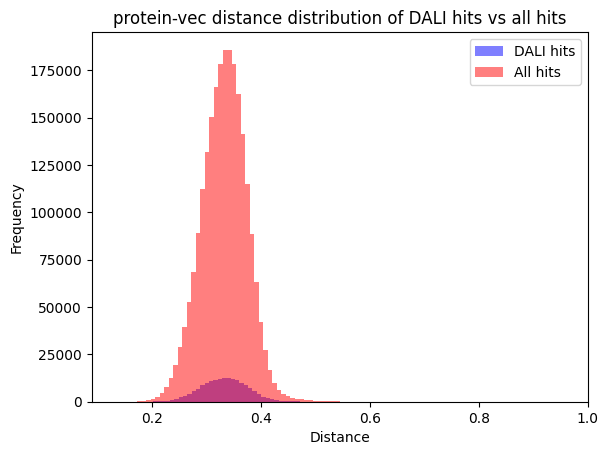

In [24]:
plt.hist(D[0][dali_faiss_idcs], bins=100, alpha=0.5, label='DALI hits', color='blue')
plt.hist(D[0], bins=100, alpha=0.5, label='All hits', color='red')
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('protein-vec distance distribution of DALI hits vs all hits')

In [97]:
# index into afdb metadata with dali_test['target']
metadata_test_target = [afdb_metadata.index(x) for x in dali_test['target']]

KeyboardInterrupt: 

In [64]:
afdb_metadata.index(dali_test['target'][0])

1107878

## Scratch

In [ ]:
'>1oisA' in scope_metadata
# get location of 1oisA in scope
scope_idx = [i for i, x in enumerate(scope_metadata) if '>1oisA' in x][0]
print(scope_idx)

In [ ]:
# sort dali_test by Z score
dali_test_sorted = dali_test.sort_values('Z', ascending=False)